In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch

In [ ]:
data=pd.read_csv('/content/linear.csv')
x=data.iloc[:,0].values
y=data.iloc[:,1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train.reshape(-1, 1))
x_test=scaler.transform(x_test.reshape(-1, 1))

In [ ]:
x_train_tensor=torch.tensor(x_train,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32).view(-1,1)
x_test_tensor=torch.tensor(x_test,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32).view(-1,1)

In [ ]:
class NeuralNetwork(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=torch.nn.Linear(1,8)
    self.fc2=torch.nn.Linear(8,12)
    self.fc3=torch.nn.Linear(12,1)
    self.relu=torch.nn.ReLU()
    self.history={'loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
cynthia_brain=NeuralNetwork()
loss_fn=torch.nn.MSELoss()
optimizer=torch.optim.RMSprop(cynthia_brain.parameters(),lr=0.001)

In [ ]:
def train_model(model, x_train, y_train, loss_fn, optimizer, epochs):
  for epoch in range(epochs):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [ ]:
train_model(cynthia_brain, x_train_tensor, y_train_tensor, loss_fn, optimizer,2000)

Epoch [0/2000], Loss: 14263.797852
Epoch [200/2000], Loss: 12610.597656
Epoch [400/2000], Loss: 9141.625000
Epoch [600/2000], Loss: 4514.661621
Epoch [800/2000], Loss: 1079.265381
Epoch [1000/2000], Loss: 136.069122
Epoch [1200/2000], Loss: 70.277428
Epoch [1400/2000], Loss: 33.613686
Epoch [1600/2000], Loss: 10.799138
Epoch [1800/2000], Loss: 2.454098


In [ ]:
with torch.no_grad():
  y_pred = cynthia_brain(x_test_tensor)
  test_loss = loss_fn(y_pred, y_test_tensor)
  print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 102.892807


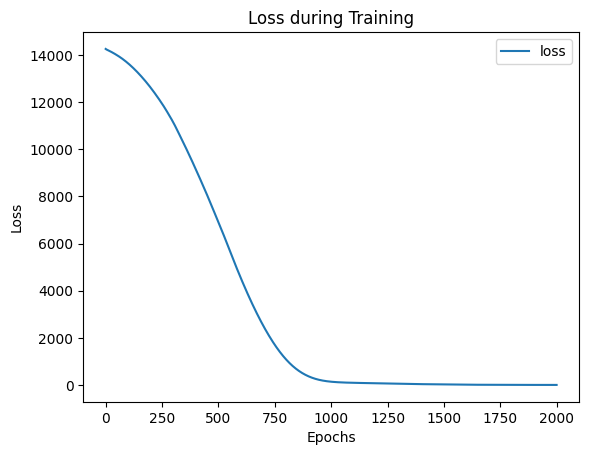

In [ ]:
loss_df = pd.DataFrame(cynthia_brain.history)
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[23]], dtype=torch.float32)
prediction = cynthia_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 230.885986328125
